In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('C:/Users/nazar/Tennis_Match_Prediction/data/processed_data/data_2010_to_2022.csv')

In [9]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,20100103,1,104053,1.0,NaN,...,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
1,2010-339,Brisbane,Hard,32,A,20100103,2,104958,NaN,WC,...,34.0,22.0,14.0,9.0,7.0,10.0,134.0,400.0,78.0,590.0
2,2010-339,Brisbane,Hard,32,A,20100103,3,104755,NaN,NaN,...,58.0,38.0,14.0,14.0,7.0,11.0,52.0,850.0,88.0,568.0
3,2010-339,Brisbane,Hard,32,A,20100103,4,105051,NaN,Q,...,29.0,16.0,15.0,9.0,2.0,5.0,285.0,151.0,28.0,1260.0
4,2010-339,Brisbane,Hard,32,A,20100103,5,104607,4.0,NaN,...,41.0,26.0,14.0,9.0,6.0,9.0,20.0,1655.0,251.0,179.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36509 non-null  object 
 1   tourney_name        36509 non-null  object 
 2   surface             36509 non-null  object 
 3   draw_size           36509 non-null  int64  
 4   tourney_level       36509 non-null  object 
 5   tourney_date        36509 non-null  int64  
 6   match_num           36509 non-null  int64  
 7   winner_id           36509 non-null  int64  
 8   winner_seed         15622 non-null  float64
 9   winner_entry        4718 non-null   object 
 10  winner_name         36509 non-null  object 
 11  winner_hand         36500 non-null  object 
 12  winner_ht           35944 non-null  float64
 13  winner_ioc          36509 non-null  object 
 14  winner_age          36506 non-null  float64
 15  loser_id            36509 non-null  int64  
 16  lose

In [51]:
# making dataset with 50/50 distribution
winner_df, loser_df = train_test_split(df, test_size = 0.5, random_state = 17)

In [52]:
winner_df['player_id'] = winner_df['winner_id']

In [53]:
winner_df['target'] = 1
winner_df[['player_id','winner_id','loser_id','target']]


,player_id,winner_id,loser_id,target
5527,104868,104868,105226,1
22339,124014,124014,105359,1
32243,106426,106426,106421,1
5267,104386,104386,104269,1
27131,200282,200282,103852,1
...,...,...,...,...
31044,106148,106148,105487,1
25631,104571,104571,126207,1
33174,105077,105077,144869,1
34959,128034,128034,105676,1


In [54]:
winner_df = winner_df.rename(columns={'player_id':'player1_id','loser_id':'player2_id'})
winner_df = winner_df.drop(['winner_id'],axis = 1)
winner_df[['player1_id','player2_id','target']]


,player1_id,player2_id,target
5527,104868,105226,1
22339,124014,105359,1
32243,106426,106421,1
5267,104386,104269,1
27131,200282,103852,1
...,...,...,...
31044,106148,105487,1
25631,104571,126207,1
33174,105077,144869,1
34959,128034,105676,1


In [57]:
loser_df['player_id'] = loser_df['loser_id']
loser_df['target'] = 0
loser_df[['player_id','loser_id','winner_id','target']]

,player_id,loser_id,winner_id,target
20269,105227,105227,106058,0
2541,103812,103812,104719,0
32832,104312,104312,125802,0
6976,104755,104755,104925,0
35514,105777,105777,200624,0
...,...,...,...,...
7778,105332,105332,103970,0
28128,105063,105063,103333,0
23994,105173,105173,105217,0
33407,106298,106298,104269,0


In [60]:
loser_df = loser_df.rename(columns={'player_id':'player1_id','winner_id':'player2_id'})
loser_df = loser_df.drop(['loser_id'],axis = 1)
loser_df[['player1_id','player2_id','target']]


,player1_id,player2_id,target
20269,105227,106058,0
2541,103812,104719,0
32832,104312,125802,0
6976,104755,104925,0
35514,105777,200624,0
...,...,...,...
7778,105332,103970,0
28128,105063,103333,0
23994,105173,105217,0
33407,106298,104269,0


In [61]:
winner_df.shape, loser_df.shape

((18254, 50), (18255, 50))

In [62]:
#concat our datasets

In [63]:
df = pd.concat([winner_df,loser_df], axis = 0)

In [64]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_seed,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
5527,2011-D078,Davis Cup G2 R3: GBR vs HUN,Hard,4,D,20110916,1,NaN,NaN,James Ward,...,NaN,NaN,NaN,NaN,149.0,371.0,262.0,179.0,104868,1
22339,2017-M010,s Hertogenbosch,Grass,32,A,20170612,276,NaN,NaN,Ernesto Escobedo,...,8.0,9.0,2.0,6.0,77.0,683.0,163.0,344.0,124014,1
32243,2021-1536,Madrid Masters,Clay,64,M,20210503,286,16.0,NaN,Cristian Garin,...,17.0,14.0,6.0,9.0,25.0,2215.0,3.0,9700.0,106426,1
5267,2011-421,Canada Masters,Hard,56,M,20110808,39,NaN,NaN,Janko Tipsarevic,...,13.0,15.0,16.0,22.0,24.0,1390.0,20.0,1705.0,104386,1
27131,2019-M004,Acapulco,Hard,32,A,20190225,287,5.0,NaN,Alex De Minaur,...,NaN,NaN,NaN,NaN,26.0,1443.0,73.0,745.0,200282,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,2012-440,s Hertogenbosch,Grass,32,A,20120617,29,1.0,NaN,David Ferrer,...,18.0,14.0,0.0,2.0,6.0,5180.0,60.0,730.0,105332,0
28128,2019-540,Wimbledon,Grass,128,G,20190701,114,NaN,NaN,Ivo Karlovic,...,25.0,16.0,2.0,4.0,80.0,679.0,219.0,226.0,105063,0
23994,2018-M-DC-2018-WG-M-FRA-NED-01,Davis Cup WG R1: FRA vs NED,Hard,4,D,20180202,1,NaN,NaN,Thiemo De Bakker,...,17.0,15.0,5.0,9.0,369.0,115.0,25.0,1705.0,105173,0
33407,2021-9512,Belgrade 2,Clay,32,A,20210524,275,NaN,NaN,Fernando Verdasco,...,12.0,10.0,8.0,13.0,107.0,755.0,84.0,892.0,106298,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36509 entries, 5527 to 18196
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36509 non-null  object 
 1   tourney_name        36509 non-null  object 
 2   surface             36509 non-null  object 
 3   draw_size           36509 non-null  int64  
 4   tourney_level       36509 non-null  object 
 5   tourney_date        36509 non-null  int64  
 6   match_num           36509 non-null  int64  
 7   winner_seed         15622 non-null  float64
 8   winner_entry        4718 non-null   object 
 9   winner_name         36509 non-null  object 
 10  winner_hand         36500 non-null  object 
 11  winner_ht           35944 non-null  float64
 12  winner_ioc          36509 non-null  object 
 13  winner_age          36506 non-null  float64
 14  player2_id          36509 non-null  int64  
 15  loser_seed          8716 non-null   float64
 16  l

In [68]:
df = df.sample(frac = 1, random_state =17 )

In [69]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_seed,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
20269,2010-807,Acapulco,Clay,32,A,20100222,19,4.0,NaN,Juan Carlos Ferrero,...,10.0,9.0,3.0,7.0,16.0,1965.0,38.0,1075.0,104214,0
2541,2018-M-DC-2018-G2-AO-M-THA-LBN-01,Davis Cup G2 R3: THA vs LBN,Hard,4,D,20180915,5,NaN,NaN,Hady Habib,...,8.0,9.0,1.0,4.0,643.0,40.0,1398.0,3.0,200273,1
32832,2018-M009,Rome Masters,Clay,64,M,20180514,252,NaN,NaN,Aljaz Bedene,...,12.0,10.0,3.0,6.0,65.0,830.0,35.0,1290.0,104180,0
6976,2016-M007,Miami Masters,Hard,128,M,20160321,175,NaN,NaN,Denis Istomin,...,17.0,17.0,4.0,10.0,76.0,702.0,46.0,925.0,104797,1
35514,2021-0403,Miami Masters,Hard,128,M,20210322,274,4.0,NaN,Andrey Rublev,...,3.0,8.0,1.0,6.0,8.0,5101.0,40.0,1462.0,105916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31044,2022-0403,Miami Masters,Hard,128,M,20220321,227,NaN,Q,Yoshihito Nishioka,...,16.0,13.0,1.0,6.0,96.0,705.0,145.0,437.0,105877,0
25631,2017-M-DC-2017-G2-EPA-M-MON-SLO-01,Davis Cup G2 R1: MON vs SLO,Hard,4,D,20170203,5,NaN,NaN,Thomas Oger,...,16.0,12.0,7.0,12.0,NaN,NaN,1654.0,1.0,105798,0
33174,2011-891,Chennai,Hard,32,A,20110103,15,NaN,NaN,Alejandro Falla,...,11.0,11.0,2.0,7.0,105.0,540.0,93.0,573.0,104349,0
34959,2014-360,Casablanca,Clay,28,A,20140407,17,8.0,NaN,Guillermo Garcia Lopez,...,11.0,10.0,4.0,9.0,53.0,866.0,61.0,735.0,104122,0


In [70]:
df.reset_index(drop = True, inplace = True)

In [71]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_seed,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
0,2010-807,Acapulco,Clay,32,A,20100222,19,4.0,NaN,Juan Carlos Ferrero,...,10.0,9.0,3.0,7.0,16.0,1965.0,38.0,1075.0,104214,0
1,2018-M-DC-2018-G2-AO-M-THA-LBN-01,Davis Cup G2 R3: THA vs LBN,Hard,4,D,20180915,5,NaN,NaN,Hady Habib,...,8.0,9.0,1.0,4.0,643.0,40.0,1398.0,3.0,200273,1
2,2018-M009,Rome Masters,Clay,64,M,20180514,252,NaN,NaN,Aljaz Bedene,...,12.0,10.0,3.0,6.0,65.0,830.0,35.0,1290.0,104180,0
3,2016-M007,Miami Masters,Hard,128,M,20160321,175,NaN,NaN,Denis Istomin,...,17.0,17.0,4.0,10.0,76.0,702.0,46.0,925.0,104797,1
4,2021-0403,Miami Masters,Hard,128,M,20210322,274,4.0,NaN,Andrey Rublev,...,3.0,8.0,1.0,6.0,8.0,5101.0,40.0,1462.0,105916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36504,2022-0403,Miami Masters,Hard,128,M,20220321,227,NaN,Q,Yoshihito Nishioka,...,16.0,13.0,1.0,6.0,96.0,705.0,145.0,437.0,105877,0
36505,2017-M-DC-2017-G2-EPA-M-MON-SLO-01,Davis Cup G2 R1: MON vs SLO,Hard,4,D,20170203,5,NaN,NaN,Thomas Oger,...,16.0,12.0,7.0,12.0,NaN,NaN,1654.0,1.0,105798,0
36506,2011-891,Chennai,Hard,32,A,20110103,15,NaN,NaN,Alejandro Falla,...,11.0,11.0,2.0,7.0,105.0,540.0,93.0,573.0,104349,0
36507,2014-360,Casablanca,Clay,28,A,20140407,17,8.0,NaN,Guillermo Garcia Lopez,...,11.0,10.0,4.0,9.0,53.0,866.0,61.0,735.0,104122,0


In [72]:
df.to_csv('C:/Users/nazar/Tennis_Match_Prediction/data/processed_data/data_with_target.csv', index=False)


In [74]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_seed,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
0,2010-807,Acapulco,Clay,32,A,20100222,19,4.0,NaN,Juan Carlos Ferrero,...,10.0,9.0,3.0,7.0,16.0,1965.0,38.0,1075.0,104214,0
1,2018-M-DC-2018-G2-AO-M-THA-LBN-01,Davis Cup G2 R3: THA vs LBN,Hard,4,D,20180915,5,NaN,NaN,Hady Habib,...,8.0,9.0,1.0,4.0,643.0,40.0,1398.0,3.0,200273,1
2,2018-M009,Rome Masters,Clay,64,M,20180514,252,NaN,NaN,Aljaz Bedene,...,12.0,10.0,3.0,6.0,65.0,830.0,35.0,1290.0,104180,0
3,2016-M007,Miami Masters,Hard,128,M,20160321,175,NaN,NaN,Denis Istomin,...,17.0,17.0,4.0,10.0,76.0,702.0,46.0,925.0,104797,1
4,2021-0403,Miami Masters,Hard,128,M,20210322,274,4.0,NaN,Andrey Rublev,...,3.0,8.0,1.0,6.0,8.0,5101.0,40.0,1462.0,105916,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36509 non-null  object 
 1   tourney_name        36509 non-null  object 
 2   surface             36509 non-null  object 
 3   draw_size           36509 non-null  int64  
 4   tourney_level       36509 non-null  object 
 5   tourney_date        36509 non-null  int64  
 6   match_num           36509 non-null  int64  
 7   winner_seed         15622 non-null  float64
 8   winner_entry        4718 non-null   object 
 9   winner_name         36509 non-null  object 
 10  winner_hand         36500 non-null  object 
 11  winner_ht           35944 non-null  float64
 12  winner_ioc          36509 non-null  object 
 13  winner_age          36506 non-null  float64
 14  player2_id          36509 non-null  int64  
 15  loser_seed          8716 non-null   float64
 16  lose

In [77]:
df.describe()

,draw_size,tourney_date,match_num,winner_seed,winner_ht,winner_age,player2_id,loser_seed,loser_ht,loser_age,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
count,36509.000000,3.650900e+04,36509.000000,15622.000000,35944.000000,36506.000000,36509.000000,8716.000000,35279.000000,36507.000000,...,33998.000000,33999.000000,33998.000000,33998.000000,36284.000000,36284.000000,35908.000000,35908.000000,36509.000000,36509.000000
mean,56.003616,2.015811e+07,142.717713,7.478812,187.122691,27.210439,111228.401901,8.934488,186.413589,27.175013,...,14.914377,12.429395,4.764368,8.553444,75.049829,1910.415693,113.122647,1111.834772,111207.353255,0.499986
std,41.214716,3.732854e+04,153.215109,6.944006,7.048066,4.098287,20600.438079,7.433805,6.866034,4.249881,...,7.140787,4.278149,3.261898,4.133278,130.558831,2371.324497,182.778129,1301.161593,20534.807486,0.500007
min,2.000000,2.010010e+07,1.000000,1.000000,163.000000,14.900000,100644.000000,1.000000,163.000000,14.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,100644.000000,0.000000
25%,32.000000,2.012123e+07,16.000000,3.000000,183.000000,24.200000,104500.000000,4.000000,183.000000,24.100000,...,10.000000,9.000000,2.000000,6.000000,17.000000,665.000000,35.000000,521.000000,104527.000000,0.000000
50%,32.000000,2.016021e+07,93.000000,5.000000,188.000000,27.100000,105062.000000,7.000000,185.000000,27.100000,...,14.000000,11.000000,4.000000,8.000000,43.000000,1040.000000,66.000000,783.000000,105064.000000,0.000000
75%,64.000000,2.019032e+07,278.000000,9.000000,190.000000,30.100000,106000.000000,12.000000,190.000000,30.200000,...,19.000000,15.000000,7.000000,11.000000,82.000000,2010.000000,110.000000,1207.000000,106005.000000,1.000000
max,128.000000,2.022113e+07,1701.000000,33.000000,211.000000,42.300000,211776.000000,33.000000,211.000000,46.000000,...,101.000000,91.000000,27.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000,211573.000000,1.000000


In [81]:
df[['surface']].value_counts()

surface
Hard       21320
Clay       11261
Grass       3862
Carpet        66
dtype: int64

<Axes: xlabel='surface', ylabel='Count'>

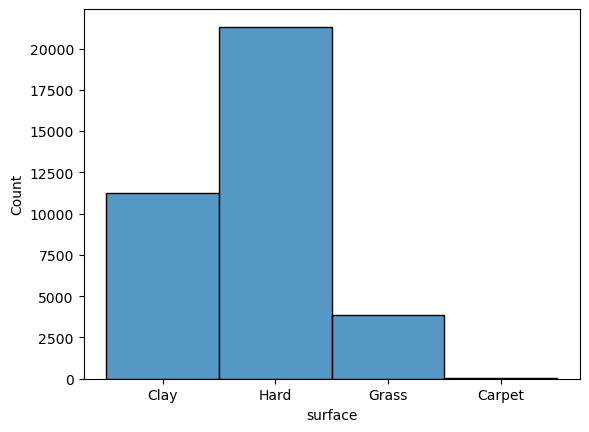

In [84]:
sns.histplot(data = df,x = 'surface')

In [85]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_seed,winner_entry,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,player1_id,target
0,2010-807,Acapulco,Clay,32,A,20100222,19,4.0,NaN,Juan Carlos Ferrero,...,10.0,9.0,3.0,7.0,16.0,1965.0,38.0,1075.0,104214,0
1,2018-M-DC-2018-G2-AO-M-THA-LBN-01,Davis Cup G2 R3: THA vs LBN,Hard,4,D,20180915,5,NaN,NaN,Hady Habib,...,8.0,9.0,1.0,4.0,643.0,40.0,1398.0,3.0,200273,1
2,2018-M009,Rome Masters,Clay,64,M,20180514,252,NaN,NaN,Aljaz Bedene,...,12.0,10.0,3.0,6.0,65.0,830.0,35.0,1290.0,104180,0
3,2016-M007,Miami Masters,Hard,128,M,20160321,175,NaN,NaN,Denis Istomin,...,17.0,17.0,4.0,10.0,76.0,702.0,46.0,925.0,104797,1
4,2021-0403,Miami Masters,Hard,128,M,20210322,274,4.0,NaN,Andrey Rublev,...,3.0,8.0,1.0,6.0,8.0,5101.0,40.0,1462.0,105916,0


In [118]:
 df['draw_size'].value_counts()

32     12186
128     7617
28      4671
64      3590
4       3124
56      2365
48      1222
96      1140
8        297
2        112
24        86
16        69
12        30
Name: draw_size, dtype: int64

In [123]:
df['tourney_level'].value_counts()

A    19696
M     6858
G     6477
D     3236
F      242
Name: tourney_level, dtype: int64

<Axes: xlabel='tourney_level', ylabel='Count'>

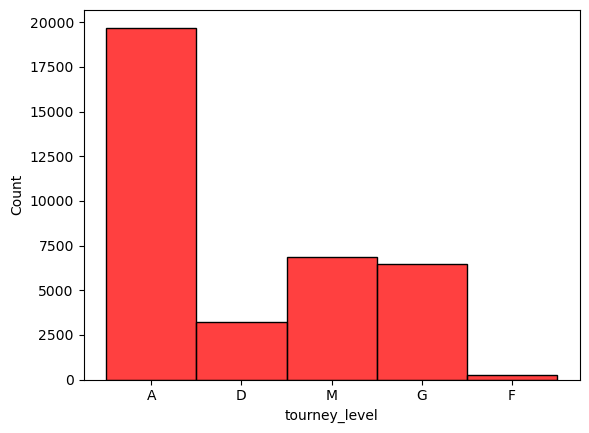

In [126]:
sns.histplot(data = df, x = 'tourney_level', color = 'red')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36509 entries, 0 to 36508
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36509 non-null  object 
 1   tourney_name        36509 non-null  object 
 2   surface             36509 non-null  object 
 3   draw_size           36509 non-null  int64  
 4   tourney_level       36509 non-null  object 
 5   tourney_date        36509 non-null  int64  
 6   match_num           36509 non-null  int64  
 7   winner_seed         15622 non-null  float64
 8   winner_entry        4718 non-null   object 
 9   winner_name         36509 non-null  object 
 10  winner_hand         36500 non-null  object 
 11  winner_ht           35944 non-null  float64
 12  winner_ioc          36509 non-null  object 
 13  winner_age          36506 non-null  float64
 14  player2_id          36509 non-null  int64  
 15  loser_seed          8716 non-null   float64
 16  lose